"스포티파이 음악 특성 기반 클러스터링 분석"

✅  과제 내용
스포티파이 음악의  수치형 feature를 이용해
**비지도 클러스터링(KMeans, DBSCAN)**을 적용하고,
Silhouette Score, Adjusted Rand Index(ARI) 등을 기반으로 군집의 품질을 평가하는 미션입니다.

In [97]:
import os
import pandas as pd
os.chdir ("../참고자료")
data = pd.read_csv("Spotify-2000.csv")
data.head(5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [98]:
# check type for each column
print(data.dtypes)

Index                      int64
Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object


In [99]:
def duration_to_seconds(duration):
    # 문자열로 변환 후 쉼표 제거
    duration = str(duration).replace(',', '')
    
    if ':' in duration:
        mins, secs = duration.split(':')
        return int(mins) * 60 + int(secs)
    else:
        return int(duration)  # 숫자 형식 문자열이면 정수로 변환

# 적용
data['Length (Duration)'] = data['Length (Duration)'].apply(duration_to_seconds)


In [100]:
print(data['Length (Duration)'].head())
print(data.dtypes['Length (Duration)'])  # int로 나와야 함


0    201
1    207
2    341
3    269
4    256
Name: Length (Duration), dtype: int64
int64


In [101]:
# check type for each column
print(data.dtypes)

Index                      int64
Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)          int64
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object


<Axes: >

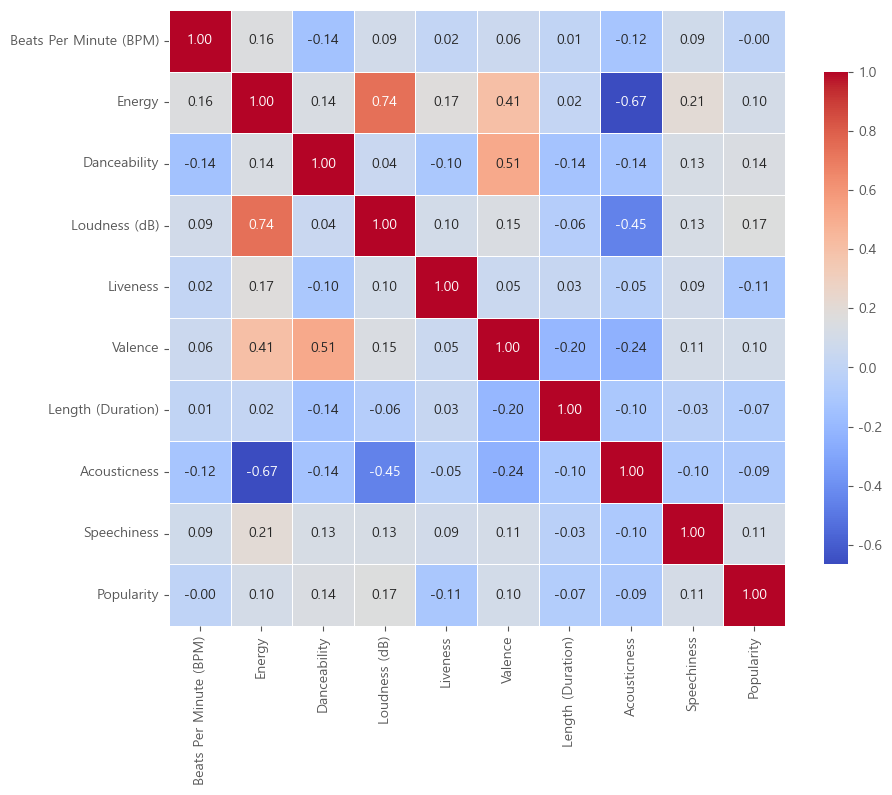

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# 사용할 수치형 feature 리스트 정의

features = [
    'Beats Per Minute (BPM)',
    'Energy',
    'Danceability',
    'Loudness (dB)',
    'Liveness',
    'Valence',
    'Length (Duration)',
    'Acousticness',
    'Speechiness',
    'Popularity'
]


# 상관계수 행렬 계산
corr = data[features].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})


In [130]:
features = [
    'Danceability',
    'Loudness (dB)',
    'Speechiness',
    'Valence',
    'Acousticness',
    'Length (Duration)'
]

X = data[features]


In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [145]:
from sklearn.cluster import KMeans

# 클러스터 수 설정 (예: 4)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 결과 저장
data['cluster_kmeans'] = kmeans_labels


c:\Users\wjdgn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [133]:
cluster_summary = data.groupby('cluster_kmeans')[features].mean()
cluster_summary


,Danceability,Loudness (dB),Speechiness,Valence,Acousticness,Length (Duration)
cluster_kmeans,,,,,,
0,61.226728,-7.942857,5.820276,66.006452,17.376037,242.528111
1,43.702970,-10.280528,4.009901,29.597360,42.563256,286.214521


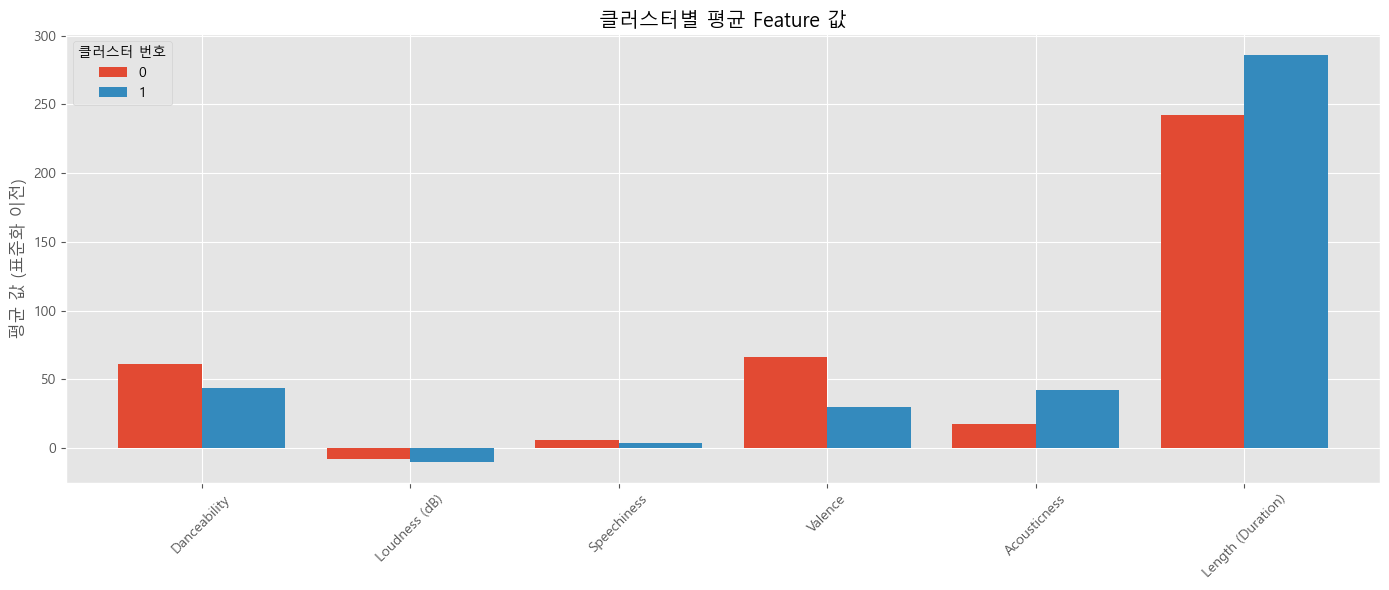

In [146]:
import matplotlib.pyplot as plt

# 시스템에 설치된 한글 폰트 설정 (Windows 기준)
plt.rc('font', family='Malgun Gothic')  # '맑은 고딕' 폰트 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


# 스타일 설정
plt.style.use('ggplot')

# 그래프 크기
cluster_summary.T.plot(kind='bar', figsize=(14, 6), width=0.8)

plt.title('클러스터별 평균 Feature 값')
plt.ylabel('평균 값 (표준화 이전)')
plt.xticks(rotation=45)
plt.legend(title='클러스터 번호')
plt.tight_layout()
plt.show()


In [147]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, data['cluster_kmeans'])
print(f"Silhouette Score (KMeans): {sil_score:.4f}")


Silhouette Score (KMeans): 0.2322
